In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP

import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

In [2]:
#Creating dataframe for data.
data = pd.read_csv('/Users/kristywendt/Desktop/LARYNX_ALL.csv', delimiter=',',index_col=0)
nRow, nCol = data.shape
print(f'There are {nRow} rows and {nCol} columns in data.')

There are 18032 rows and 16 columns in data.


In [3]:
#Inspect first 5 rows of data.
data.head(5)

,10.5_n1,10.5_n2,11.5_n1,11.5_n2,13.5_n1,13.5_n2,15.5_n1,15.5_n2,15.5_n3,15.5_n4,18.5_n1,18.5_n2,P0_n1,P0_n2,Adult_n1,Adult_n2
gene_id,,,,,,,,,,,,,,,,
GNAI3,3452.0,4102.0,700.0,1873.0,4017.0,2402.0,4836.0,5603.0,1350.0,1168.0,1675.0,2213.0,3865.00,2938.0,4058.0,4937.0
CDC45,795.0,860.0,114.0,213.0,592.0,406.0,526.0,645.0,100.0,76.0,106.0,113.0,294.39,207.0,149.0,123.0
SCML2,148.0,198.0,65.0,100.0,290.0,214.0,363.0,541.0,143.0,75.0,89.0,99.0,141.00,167.0,83.0,95.0
APOH,2.0,0.0,1.0,0.0,108.0,7.0,2.0,0.0,3.0,3.0,4.0,2.0,5.00,6.0,3.0,1.0
NARF,1305.0,1770.0,291.0,839.0,2322.0,2147.0,1986.0,1937.0,1117.0,951.0,1464.0,1007.0,1441.00,1239.0,1085.0,1297.0


In [4]:
In [4]:
#Creating dataframe for labels.
labels = pd.read_csv('/Users/kristywendt/Desktop/Labels.csv', delimiter=',')
nRow, nCol = labels.shape
print(f'There are {nRow} rows and {nCol} columns in labels dataframe.')

SyntaxError: invalid syntax (<ipython-input-4-531ceb64bf6a>, line 1)

In [5]:
#Creating dataframe for labels.
labels = pd.read_csv('/Users/kristywendt/Desktop/Labels.csv', delimiter=',')
nRow, nCol = labels.shape
print(f'There are {nRow} rows and {nCol} columns in labels dataframe.')

There are 16 rows and 2 columns in labels dataframe.


In [6]:
#Visualize data using Principal Component Analysis.
print("Principal Component Analysis (PCA)")
pca = PCA(n_components = 2).fit_transform(X_std)
pca_df = pd.DataFrame(data=pca, columns=['PC1','PC2']).join(labels)
palette = sns.color_palette("muted", n_colors=7)
sns.set_style("white")
sns.scatterplot(x='PC1',y='PC2',hue='Class',data=pca_df, palette=palette, linewidth=0.2, s=30, alpha=1).set_title('PCA')

Principal Component Analysis (PCA)


NameError: name 'X_std' is not defined

In [7]:
#Find unique classes of cancer subtypes.
labels['Class'].unique()

array(['E10.5', 'E11.5', 'E13.5', 'E15.5', 'E18.5', 'P0', 'Adult'],
      dtype=object)

In [8]:
#Create a 2D numpy array of values in data.
X = data.values
X[0:5]

array([[3.4520e+03, 4.1020e+03, 7.0000e+02, 1.8730e+03, 4.0170e+03,
        2.4020e+03, 4.8360e+03, 5.6030e+03, 1.3500e+03, 1.1680e+03,
        1.6750e+03, 2.2130e+03, 3.8650e+03, 2.9380e+03, 4.0580e+03,
        4.9370e+03],
       [7.9500e+02, 8.6000e+02, 1.1400e+02, 2.1300e+02, 5.9200e+02,
        4.0600e+02, 5.2600e+02, 6.4500e+02, 1.0000e+02, 7.6000e+01,
        1.0600e+02, 1.1300e+02, 2.9439e+02, 2.0700e+02, 1.4900e+02,
        1.2300e+02],
       [1.4800e+02, 1.9800e+02, 6.5000e+01, 1.0000e+02, 2.9000e+02,
        2.1400e+02, 3.6300e+02, 5.4100e+02, 1.4300e+02, 7.5000e+01,
        8.9000e+01, 9.9000e+01, 1.4100e+02, 1.6700e+02, 8.3000e+01,
        9.5000e+01],
       [2.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0800e+02,
        7.0000e+00, 2.0000e+00, 0.0000e+00, 3.0000e+00, 3.0000e+00,
        4.0000e+00, 2.0000e+00, 5.0000e+00, 6.0000e+00, 3.0000e+00,
        1.0000e+00],
       [1.3050e+03, 1.7700e+03, 2.9100e+02, 8.3900e+02, 2.3220e+03,
        2.1470e+03, 1.9860e+03, 

In [9]:
#Standardize the features before performing dimensionality reduction, (mean=0,standard deviation =1)
X_std = StandardScaler().fit_transform(X)

Principal Component Analysis (PCA)


Text(0.5, 1.0, 'PCA')

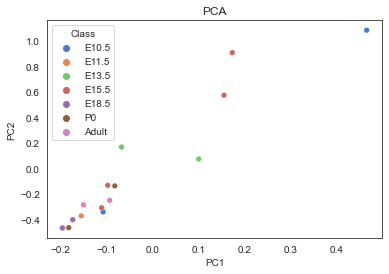

In [10]:
#Visualize data using Principal Component Analysis.
print("Principal Component Analysis (PCA)")
pca = PCA(n_components = 2).fit_transform(X_std)
pca_df = pd.DataFrame(data=pca, columns=['PC1','PC2']).join(labels)
palette = sns.color_palette("muted", n_colors=7)
sns.set_style("white")
sns.scatterplot(x='PC1',y='PC2',hue='Class',data=pca_df, palette=palette, linewidth=0.2, s=30, alpha=1).set_title('PCA')

In [11]:
#Visualize data using UMAP.
print("Uniform Manifold Approximation and Projection (UMAP)")
model = UMAP(n_neighbors = 40, min_dist = 0.4, n_components = 2)
umap = model.fit_transform(X_std)
umap_df = pd.DataFrame(data=umap, columns=['UMAP1','UMAP2']).join(labels)
palette = sns.color_palette("muted", n_colors=5)
sns.set_style("white")
sns.scatterplot(x='UMAP1',y='UMAP2',hue='Class',data=umap_df, palette=palette, linewidth=0.2, s=30, alpha=1).set_title('UMAP')

Uniform Manifold Approximation and Projection (UMAP)


ValueError: The palette list has the wrong number of colors.

Uniform Manifold Approximation and Projection (UMAP)


Text(0.5, 1.0, 'UMAP')

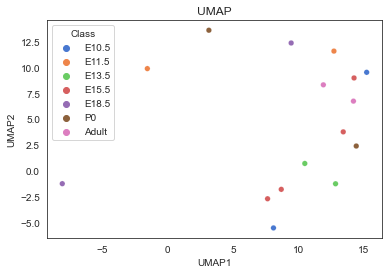

In [12]:
#Visualize data using UMAP.
print("Uniform Manifold Approximation and Projection (UMAP)")
model = UMAP(n_neighbors = 40, min_dist = 0.4, n_components = 2)
umap = model.fit_transform(X_std)
umap_df = pd.DataFrame(data=umap, columns=['UMAP1','UMAP2']).join(labels)
palette = sns.color_palette("muted", n_colors=7)
sns.set_style("white")
sns.scatterplot(x='UMAP1',y='UMAP2',hue='Class',data=umap_df, palette=palette, linewidth=0.2, s=30, alpha=1).set_title('UMAP')

t-Distributed Stochastic Neighbor Embedding (tSNE)


Text(0.5, 1.0, 't-SNE')

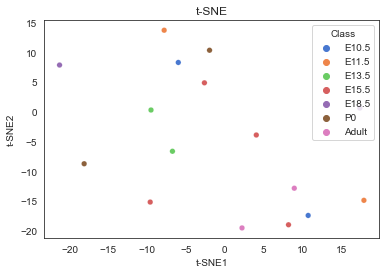

In [13]:
#Visualize data using t-SNE.
print("t-Distributed Stochastic Neighbor Embedding (tSNE)")
model = TSNE(learning_rate = 10, n_components = 2, random_state=123, perplexity = 30)
tsne = model.fit_transform(X_std)
tsne_df = pd.DataFrame(data=tsne, columns=['t-SNE1','t-SNE2']).join(labels)
palette = sns.color_palette("muted", n_colors=7)
sns.set_style("white")
sns.scatterplot(x='t-SNE1',y='t-SNE2',hue='Class',data=tsne_df, palette=palette, linewidth=0.2, s=30, alpha=1).set_title('t-SNE')